In [1]:
import TimeTagger as TT
from TimeTagger import Countrate, Counter

In [4]:
import pathlib
list(pathlib.Path(r'C:\Program Files\Micro-Manager-nightly-markt').glob('*.cfg'))

[WindowsPath('C:/Program Files/Micro-Manager-nightly-markt/DCC_alone.cfg'),
 WindowsPath('C:/Program Files/Micro-Manager-nightly-markt/ImageJ.cfg'),
 WindowsPath('C:/Program Files/Micro-Manager-nightly-markt/MMConfig_demo.cfg'),
 WindowsPath('C:/Program Files/Micro-Manager-nightly-markt/test-dcc.cfg')]

In [8]:
#!cmd
#export MICROMANAGER_PATH=/path/to/installation
#mmcore use <some path or pattern>

SyntaxError: invalid syntax (1365597985.py, line 2)

## do only once for pymmcore-plus sanity tests

In [9]:
! mmcore --version

pymmcore-plus v0.13.7
pymmcore v11.5.0.73.0
MMCore vMMCore version 11.5.0
Device API version 73, Module API version 10


In [10]:
! mmcore list

ðŸ“� C:\Program Files
   * Micro-Manager-1.4 (active)


In [14]:
! mmcore use "C:\Program Files\Micro-Manager-nightly-markt"

using C:\Program Files\Micro-Manager-nightly-markt


In [12]:
! mmcore list

ðŸ“� C:\Program Files
   * Micro-Manager-nightly-markt (Dev. Interface 73) (active)
   â€¢ Micro-Manager-1.4


In [13]:
from pymmcore_plus import find_micromanager
print(find_micromanager())

C:\Program Files\Micro-Manager-nightly-markt


## back to dcc load

In [5]:
from pymmcore_plus import CMMCorePlus
mmc = CMMCorePlus()
#mmc.loadSystemConfiguration(r'C:/Program Files/Micro-Manager-2.0.0/DCC_alone.cfg')
mmc.loadSystemConfiguration(r'C:/Program Files/Micro-Manager-nightly-markt/DCC_alone.cfg')

[04/17/25 15:33:46] ERROR    could not find micromanager directory for device interface 73. Please run ]8;id=157588;file://C:\Users\lociuser\code\timetagger-scripts\.venv\Lib\site-packages\pymmcore_plus\_util.py\_util.py]8;;\:]8;id=524682;file://C:\Users\lociuser\code\timetagger-scripts\.venv\Lib\site-packages\pymmcore_plus\_util.py#190\190]8;;\
                             'mmcore install'                                                                      

OSError: Line 7: Device,DCCHub,BH_DCC_DCU,DCCHub
Failed to load device adapter "BH_DCC_DCU" [ Failed to load module "mmgr_dal_BH_DCC_DCU" [ The module, or a module it depends upon, could not be found (Windows error: The specified module could not be found.) ] ]



In [2]:
tagger = TT.createTimeTagger()
tagger.reset()
tagger.clearOverflows()


In [3]:
''' set variables and triggers ''' 

# input channels
pmt1_start = -1
pmt1_stop = 1

# trigger levels in V
tagger.setTriggerLevel(pmt1_start,-0.01)  


In [4]:
channels = [pmt1_start,pmt1_stop]

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [11]:
binwidth = 1E9
n_values = 5000
binwidth*n_values/1E12

5.0

In [10]:
import time

5.0 sec


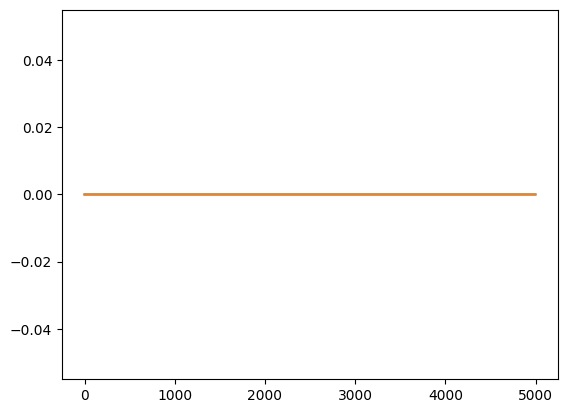

In [12]:
binwidth = 1E9
n_values = 5000
counter = Counter(tagger, channels, binwidth, n_values) 
counter.startFor(capture_duration=binwidth*n_values)
print(binwidth*n_values/1E12,'sec')
while counter.isRunning(): time.sleep(binwidth*n_values/1E12)
if not counter.isRunning():
    data = counter.getData()
    plt. plot(data.T)
    

In [13]:
counter.getConfiguration()

{'name': 'Counter',
 'params': {'binwidth': 1000000000, 'channels': [-1, 1], 'n values': 5000},
 'registered channels': [-1, 1],
 'virtual channels': []}

In [12]:
ncounts,data 

(0, array([nan, nan]))

In [1]:
tagger.stopServer

NameError: name 'tagger' is not defined